In [1]:
import requests

# class labels
LABELS_URL = 'https://s3.amazonaws.com/outcome-blog/imagenet/labels.json'
labels = {int(key):value for (key, value) in requests.get(LABELS_URL).json().items()}

In [46]:
import torch
import torch.nn as nn
from torchvision.models import resnet101

In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [47]:
model = resnet101(pretrained=True).to("cuda")
model.eval()

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /home/aamikhaylov/.torch/models/resnet101-5d3b4d8f.pth
178728960it [00:15, 11481728.84it/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [10]:
!wget 'https://upload.wikimedia.org/wikipedia/commons/6/66/An_up-close_picture_of_a_curious_male_domestic_shorthair_tabby_cat.jpg'

--2019-07-25 14:33:11--  https://upload.wikimedia.org/wikipedia/commons/6/66/An_up-close_picture_of_a_curious_male_domestic_shorthair_tabby_cat.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 789779 (771K) [image/jpeg]
Saving to: ‘An_up-close_picture_of_a_curious_male_domestic_shorthair_tabby_cat.jpg’

An_up-close_picture 100%[===================>] 771.27K  2.80MB/s    in 0.3s    

2019-07-25 14:33:11 (2.80 MB/s) - ‘An_up-close_picture_of_a_curious_male_domestic_shorthair_tabby_cat.jpg’ saved [789779/789779]



In [48]:
import albumentations as A
import cv2
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [49]:
image = cv2.imread('An_up-close_picture_of_a_curious_male_domestic_shorthair_tabby_cat.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image = image

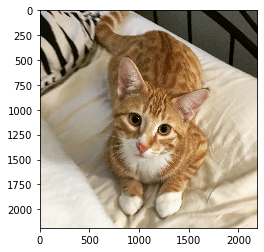

In [50]:
plt.imshow(image)

In [51]:
preprocess = A.Compose([A.Normalize(max_pixel_value=255.0),A.Resize(400,400)])
preprocess

Compose([
  Normalize(always_apply=False, p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0),
  Resize(always_apply=False, p=1, height=400, width=400, interpolation=1),
], p=1.0, bbox_params={}, keypoint_params={}, additional_targets={})

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


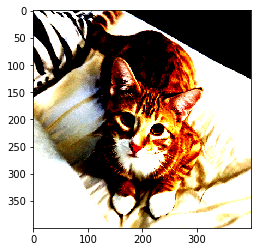

In [52]:
plt.imshow(preprocess(image=image)['image'])
t = torch.tensor(preprocess(image=image)['image'], dtype=torch.float).permute(2,0,1).unsqueeze(0)
# t = t.clamp(0,1)

In [53]:
label = int(model(t).argmax())
labels[label]

'tiger cat'

```














```

In [ ]:
from tensorboardX import SummaryWriter

In [67]:
params = []

In [68]:
for name, m in model.named_modules():
    if name == 'layer4.2' or name == 'fc':
        params.extend(m.parameters())

In [ ]:
opt = torch.optim.Adam(params=params, lr = 0.001)
model.train()
data_iter = data_loader()

In [ ]:
for i in n_iter:
    batch_x, batch_y = dataiter.next()
    y_pred = model(batch_x)